# Ejemplo de ciencia de datos

## Lectura del dataset

In [1]:
# Ruta donde se encuentran los datos en Github
path = "https://raw.githubusercontent.com/BioAITeamLearning/IntroPython_2024_01_UAI/main/Data/"

In [3]:
# Leer el dataset
import pandas as pd
df = pd.read_csv(path+"BDParkinson_Prediction.csv")

In [4]:
df

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.000000,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.000000,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.000000,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.000000,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.000000,0.677162,0.209531,0.991066,Class_1
...,...,...,...,...,...,...,...
495,0.712586,0.219776,0.510939,0.593045,0.268087,0.092055,Class_4
496,0.686058,0.224004,0.518661,0.600564,0.253298,0.093827,Class_4
497,0.698661,0.216604,0.505791,0.591165,0.241696,0.090734,Class_4
498,0.714926,0.222613,0.562420,0.587406,0.271037,0.093245,Class_4


## División en datos de entrenamiento y testing

In [5]:
# Obtener las features
features = df.drop(['CLASS'], axis=1)
features.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6
0,0.624731,0.135424,0.0,0.675282,0.182203,0.962960
1,0.647223,0.136211,0.0,0.679511,0.195903,0.987387
2,0.706352,0.187593,0.0,0.632989,0.244884,0.991182
3,0.680291,0.192076,0.0,0.651786,0.233528,0.991857
4,0.660104,0.161131,0.0,0.677162,0.209531,0.991066


In [6]:
# Obtener los labels
labels = df['CLASS']
labels.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: CLASS, dtype: object

In [8]:
# Separación de la data, con un 20% para testing, y 80% para entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.20, random_state=1, stratify=labels)

In [9]:
# Verificacion de la cantidad de datos para entrenamiento y para testing
import numpy as np
print("y_train labels unique:",np.unique(y_train, return_counts=True))
print("y_test labels unique: ",np.unique(y_test, return_counts=True))

y_train labels unique: (array(['Class2', 'Class_1', 'Class_3', 'Class_4'], dtype=object), array([100, 100, 100, 100]))
y_test labels unique:  (array(['Class2', 'Class_1', 'Class_3', 'Class_4'], dtype=object), array([25, 25, 25, 25]))


## Aprendizaje supervisado

### Clasificación

In [11]:
# Cargamos el modelo KNN sin entrenar
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=3)
# Entrenamos el modelo KNN
model_KNN.fit(X_train, y_train)
# Obtenemos la métrica lograda
model_KNN.score(X_test, y_test)

1.0

In [12]:
df

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.000000,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.000000,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.000000,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.000000,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.000000,0.677162,0.209531,0.991066,Class_1
...,...,...,...,...,...,...,...
495,0.712586,0.219776,0.510939,0.593045,0.268087,0.092055,Class_4
496,0.686058,0.224004,0.518661,0.600564,0.253298,0.093827,Class_4
497,0.698661,0.216604,0.505791,0.591165,0.241696,0.090734,Class_4
498,0.714926,0.222613,0.562420,0.587406,0.271037,0.093245,Class_4


In [13]:
model_KNN.predict([[0.712586	,0.219776	,0.510939,	0.593045,	0.268087,	0.092055]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Class_4'], dtype=object)

In [14]:
y_test

2      Class_1
92     Class_1
255    Class_3
105    Class_1
468    Class_4
        ...   
316    Class_3
126     Class2
280    Class_3
118    Class_1
318    Class_3
Name: CLASS, Length: 100, dtype: object

In [16]:
# Metricas: matriz de confusión y reporte de clasificación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Predecir y obtener la matriz de confusión
y_pred=model_KNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25  0  0  0]
 [ 0 25  0  0]
 [ 0  0 25  0]
 [ 0  0  0 25]]
              precision    recall  f1-score   support

      Class2       1.00      1.00      1.00        25
     Class_1       1.00      1.00      1.00        25
     Class_3       1.00      1.00      1.00        25
     Class_4       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [17]:
# Crear los modelos

from sklearn.tree import DecisionTreeClassifier
model_DT  = DecisionTreeClassifier(random_state=0)

from sklearn.ensemble import BaggingClassifier
model_B   = BaggingClassifier(random_state=0)

from sklearn.ensemble import RandomForestClassifier
model_RF  = RandomForestClassifier(random_state=0)

from sklearn.ensemble import AdaBoostClassifier
model_AB  = AdaBoostClassifier(random_state=0)

from sklearn.svm import SVC
model_SVM = SVC(random_state=0)

from sklearn.ensemble import ExtraTreesClassifier
model_ET  = ExtraTreesClassifier(random_state=0)

from xgboost import XGBClassifier
model_XGB = XGBClassifier(random_state=0)

from sklearn.linear_model import LogisticRegression
model_LR  = LogisticRegression(random_state=0, max_iter=200)

from sklearn.ensemble import GradientBoostingClassifier
model_GB  = GradientBoostingClassifier(random_state=0)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model_QDA = QuadraticDiscriminantAnalysis()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA = LinearDiscriminantAnalysis()

from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()

In [18]:
# Ajustar los modelos a la data de entrenamiento
model_DT.fit(X_train, y_train)
model_B.fit(X_train, y_train)
model_RF.fit(X_train, y_train)
model_AB.fit(X_train, y_train)
model_SVM.fit(X_train, y_train)
model_ET.fit(X_train, y_train)
#model_XGB.fit(X_train, y_train)
model_LR.fit(X_train, y_train)
model_GB.fit(X_train, y_train)
model_QDA.fit(X_train, y_train)
model_LDA.fit(X_train, y_train)
model_GNB.fit(X_train, y_train)

GaussianNB()

In [19]:
# Predecir y obtener el accuracy
print("DT, Accuracy: ", model_DT.score(X_test, y_test))
print("B, Accuracy: ",  model_B.score(X_test, y_test))
print("RF, Accuracy: ", model_RF.score(X_test, y_test))
print("AB, Accuracy: ", model_AB.score(X_test, y_test))
print("SVM, Accuracy: ",model_SVM.score(X_test, y_test))
print("ET, Accuracy: ", model_ET.score(X_test, y_test))
#print("XGB, Accuracy: ",model_XGB.score(X_test, y_test))
print("LR, Accuracy: ", model_LR.score(X_test, y_test))
print("GB, Accuracy: ", model_GB.score(X_test, y_test))
print("QDA, Accuracy: ",model_QDA.score(X_test, y_test))
print("LDA, Accuracy: ",model_LDA.score(X_test, y_test))
print("GNB, Accuracy: ",model_GNB.score(X_test, y_test))


DT, Accuracy:  0.99
B, Accuracy:  0.99
RF, Accuracy:  0.97
AB, Accuracy:  0.74
SVM, Accuracy:  0.97
ET, Accuracy:  0.99
LR, Accuracy:  0.97
GB, Accuracy:  0.98
QDA, Accuracy:  1.0
LDA, Accuracy:  1.0
GNB, Accuracy:  0.98


### Regresión

In [20]:
# Seleccionando datos para hacer regresión
## Train
X_train_reg = X_train.drop(['VAR5'], axis=1)
y_train_reg = X_train['VAR5']

## Test
X_test_reg = X_test.drop(['VAR5'], axis=1)
y_test_reg = X_test['VAR5']


<Axes: ylabel='VAR5'>

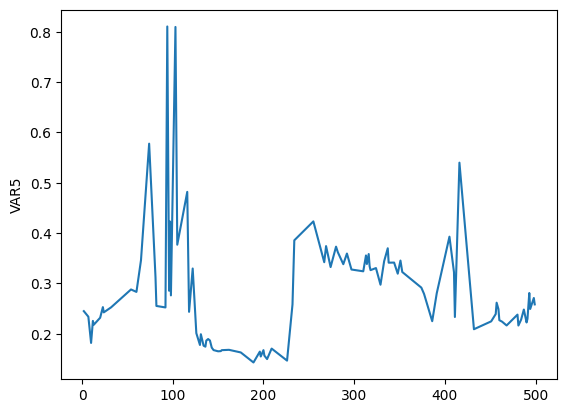

In [22]:
import seaborn as sns
# Gráfica de la variable objetivo
sns.lineplot(data=y_test_reg)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Cargamos el modelo KNN sin entrenar
model_KNNr = KNeighborsRegressor(n_neighbors=3)

# Entrenamos el modelo KNN
model_KNNr.fit(X_train_reg, y_train_reg)

# Obtenemos la métrica lograda
model_KNNr.score(X_test_reg, y_test_reg)

0.9631421177334887

<Axes: ylabel='VAR5'>

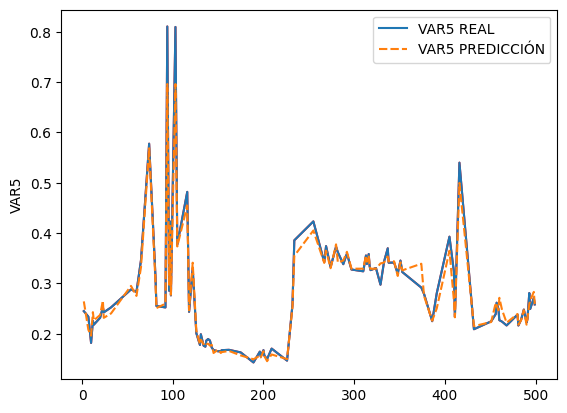

In [25]:
# Gráfica de la variable objetivo real
sns.lineplot(data=y_test_reg,c='r')

# Gráfica de la variable objetivo predicción
y_pred_reg = model_KNNr.predict(X_test_reg)
y_pred_reg = pd.DataFrame(y_pred_reg).set_index(y_test_reg.index)

# Creando un dataframe 2 columnas con variable real y la predicción
df_test_real_pred = pd.concat([y_test_reg,y_pred_reg],axis=1)
df_test_real_pred.rename(columns={'VAR5':'VAR5 REAL',
                        0:'VAR5 PREDICCIÓN'},inplace=True)

sns.lineplot(data=df_test_real_pred)

In [26]:
# Crear los modelos
from sklearn.tree import DecisionTreeRegressor
model_DTr  = DecisionTreeRegressor()

from sklearn.ensemble import BaggingRegressor
model_Br   = BaggingRegressor()

from sklearn.ensemble import RandomForestRegressor
model_RFr  = RandomForestRegressor()

from sklearn.ensemble import AdaBoostRegressor
model_ABr  = AdaBoostRegressor()

from sklearn.svm import SVR
model_SVMr = SVR()

from sklearn.ensemble import ExtraTreesRegressor
model_ETr  = ExtraTreesRegressor()

from xgboost import XGBRegressor
model_XGBr = XGBRegressor()

from sklearn.linear_model import LinearRegression
model_Lr   = LinearRegression()

from sklearn.ensemble import GradientBoostingRegressor
model_GBr  = GradientBoostingRegressor()


In [27]:
# Ajustar los modelos a la data de entrenamiento
model_DTr.fit(X_train_reg, y_train_reg)
model_Br.fit(X_train_reg, y_train_reg)
model_RFr.fit(X_train_reg, y_train_reg)
model_ABr.fit(X_train_reg, y_train_reg)
model_SVMr.fit(X_train_reg, y_train_reg)
model_ETr.fit(X_train_reg, y_train_reg)
model_XGBr.fit(X_train_reg, y_train_reg)
model_Lr.fit(X_train_reg, y_train_reg)
model_GBr.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor()

In [28]:
# Predecir y obtener el coeficiente de determinación
print("DTr: ",model_DTr.score(X_test_reg, y_test_reg))
print("Br: ",model_Br.score(X_test_reg, y_test_reg))
print("RFr: ",model_RFr.score(X_test_reg, y_test_reg))
print("ABr: ",model_ABr.score(X_test_reg, y_test_reg))
print("SVMr: ",model_SVMr.score(X_test_reg, y_test_reg))
print("ETr: ",model_ETr.score(X_test_reg, y_test_reg))
print("XGBr: ",model_XGBr.score(X_test_reg, y_test_reg))
print("Lr: ",model_Lr.score(X_test_reg, y_test_reg))
print("GBr: ",model_GBr.score(X_test_reg, y_test_reg))

DTr:  0.9333939473701152
Br:  0.9521755430796952
RFr:  0.9463222743232533
ABr:  0.9327701413351718
SVMr:  0.5280872992079053
ETr:  0.9637670215745208
XGBr:  0.948858853029048
Lr:  0.7546713332247559
GBr:  0.9468085388548643


## Importancia de características

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


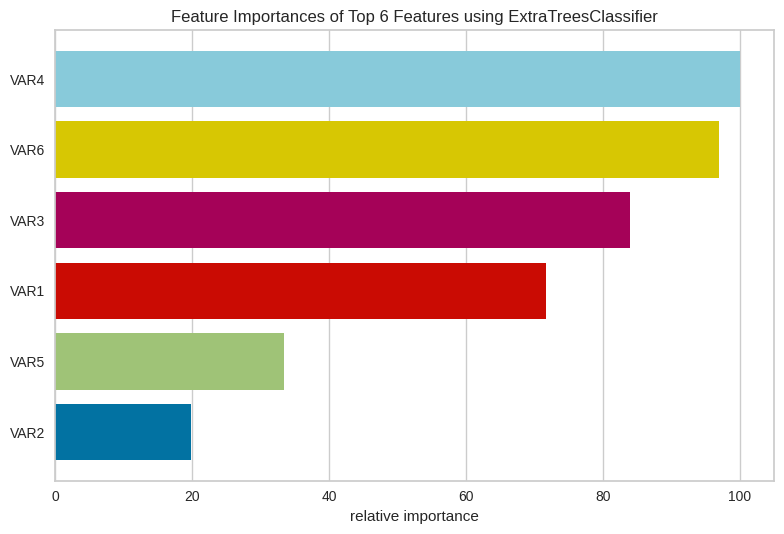

<Axes: title={'center': 'Feature Importances of Top 6 Features using ExtraTreesClassifier'}, xlabel='relative importance'>

In [30]:
# Definir el algoritmo de ML
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)


# Importancia de características
from yellowbrick.model_selection import FeatureImportances
# Mostrar la importancia de características
viz = FeatureImportances(model, topn=6)
viz.fit(X_train, y_train)
viz.show()

In [31]:
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)[:6]

,features,feature_importance
3,VAR4,0.246367
5,VAR6,0.238958
2,VAR3,0.206822
0,VAR1,0.176625
4,VAR5,0.082190
1,VAR2,0.049038


In [32]:
model = SVC(kernel="linear",random_state=0)
model.fit(X_train, y_train)
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)[:20]

,feature,feature_importance
5,VAR6,1.566236
2,VAR3,1.081330
1,VAR2,0.739577
3,VAR4,0.237416
4,VAR5,0.214015
0,VAR1,0.051399


### Clasifiquemos nuestra primer base de datos

In [33]:
import pandas as pd
from sklearn.datasets import load_iris

In [34]:
data = load_iris()
caracteristicas = pd.DataFrame(data=data.data,columns=data.feature_names)
resultados = data.target
caracteristicas.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
## IMPLEMENTA UN MODELO DE ML PARA CLASIFICAR ESTA BASE DE DATOS EN CADA UNA DE LAS CLASES.